In [1]:
import sys
sys.path.append('../src')
sys.path.append('../src/data/')
sys.path.append('../src/models/')
sys.path.append('../src/features/')
sys.path.append('../src/visualization/')
# will reload any library
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

print ("finished")

finished


In [8]:
from visualization.plot_utils import write_latex_table,\
pooling_plots, pandas_settings, plot_settings,  save_result
# general
import pandas as pd
import numpy as np
from collections import OrderedDict
from features import TrackInfo
import matplotlib.pyplot as plt
import seaborn as sns
from data import compressed_pickle as cpick
plot_settings()
pandas_settings()
SAVE_PATH='../data/tsne'

In [9]:
import gensim

tracks = TrackInfo(subset='5k-')
PATH='../data/w2v/track_128_1cut'
model = gensim.models.Word2Vec.load(PATH)
gtopic = cpick.load('../data/interim/track_uri2gtopics_max.pkl.bz2')
gtopic_explain = cpick.load('../data/genre_lda/lda_topics_explained.pkl.bz2')
print(len(gtopic))
gtopic_explain

2262292


{-1: 'Topicless',
 0: 'Rap/Hip Hop',
 1: 'punk-like',
 2: 'emo-like',
 3: 'ambient/foreign-like',
 4: 'latin-dance-like',
 5: 'worship/rock',
 6: 'rock-like',
 7: 'metal-like',
 8: 'blues',
 9: 'house',
 10: 'latin-rock',
 11: 'indie-rock',
 12: 'foreign',
 13: 'instrumental',
 14: 'country',
 15: 'jazz',
 16: 'electronic',
 17: 'new_wave',
 18: 'pop-rock',
 19: 'dance-pop'}

In [44]:
turis=[]
for pid in range(0,5000):
    turi,auri = tracks.get_playlist(pid)
    turis = turis + turi
turis = list(set(turis))
print(len(turis))
X = [ ]
for turi in turis:
    X.append(model.wv[turi])
X = np.array(X)
X.shape

108870


(108870, 128)

In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

X_pre = StandardScaler().fit_transform(X)
print(X_pre.shape)
X_pca = PCA(n_components=50).fit_transform(X_pre)
print(X_pca.shape)
X_emb = TSNE(n_components=2,init='pca').fit_transform(X_pca)
print(X_emb.shape)
cpick.save('../data/tsne/subset_emb',X_emb)
cpick.save('../data/tsne/subset_turis',turis)

(108870, 128)
(108870, 50)
(108870, 2)
Saving to ../data/tsne/subset_emb.npy.bz2


File ../data/tsne/subset_emb.npy.bz2 cannot be written


AttributeError: 'FileNotFoundError' object has no attribute 'decode'

In [46]:
cpick.save('../data/tsne/subset_emb',X_emb)
cpick.save('../data/tsne/subset_turis',turis)

[autoreload of features failed: Traceback (most recent call last):
  File "/home/beangoben/anaconda3/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 246, in check
    superreload(m, reload, self.old_objects)
  File "/home/beangoben/anaconda3/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 369, in superreload
    module = reload(module)
  File "/home/beangoben/anaconda3/lib/python3.6/imp.py", line 315, in reload
    return importlib.reload(module)
  File "/home/beangoben/anaconda3/lib/python3.6/importlib/__init__.py", line 166, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 618, in _exec
  File "<frozen importlib._bootstrap_external>", line 678, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "../src/features/__init__.py", line 4, in <module>
    from .genre_features import GenreFeatures, GenreLDA
ImportError: cannot import name 'GenreLDA'
]


Saving to ../data/tsne/subset_emb.npy.bz2
Saving to ../data/tsne/subset_turis.pkl.bz2


In [35]:
gtopic_explain

{-1: 'Topicless',
 0: 'Rap/Hip Hop',
 1: 'punk-like',
 2: 'emo-like',
 3: 'ambient/foreign-like',
 4: 'latin-dance-like',
 5: 'worship/rock',
 6: 'rock-like',
 7: 'metal-like',
 8: 'blues',
 9: 'house',
 10: 'latin-rock',
 11: 'indie-rock',
 12: 'foreign',
 13: 'instrumental',
 14: 'country',
 15: 'jazz',
 16: 'electronic',
 17: 'new_wave',
 18: 'pop-rock',
 19: 'dance-pop'}

['latin-dance-like', 'electronic', 'indie-rock', 'Rap/Hip Hop', 'dance-pop', 'rock-like']


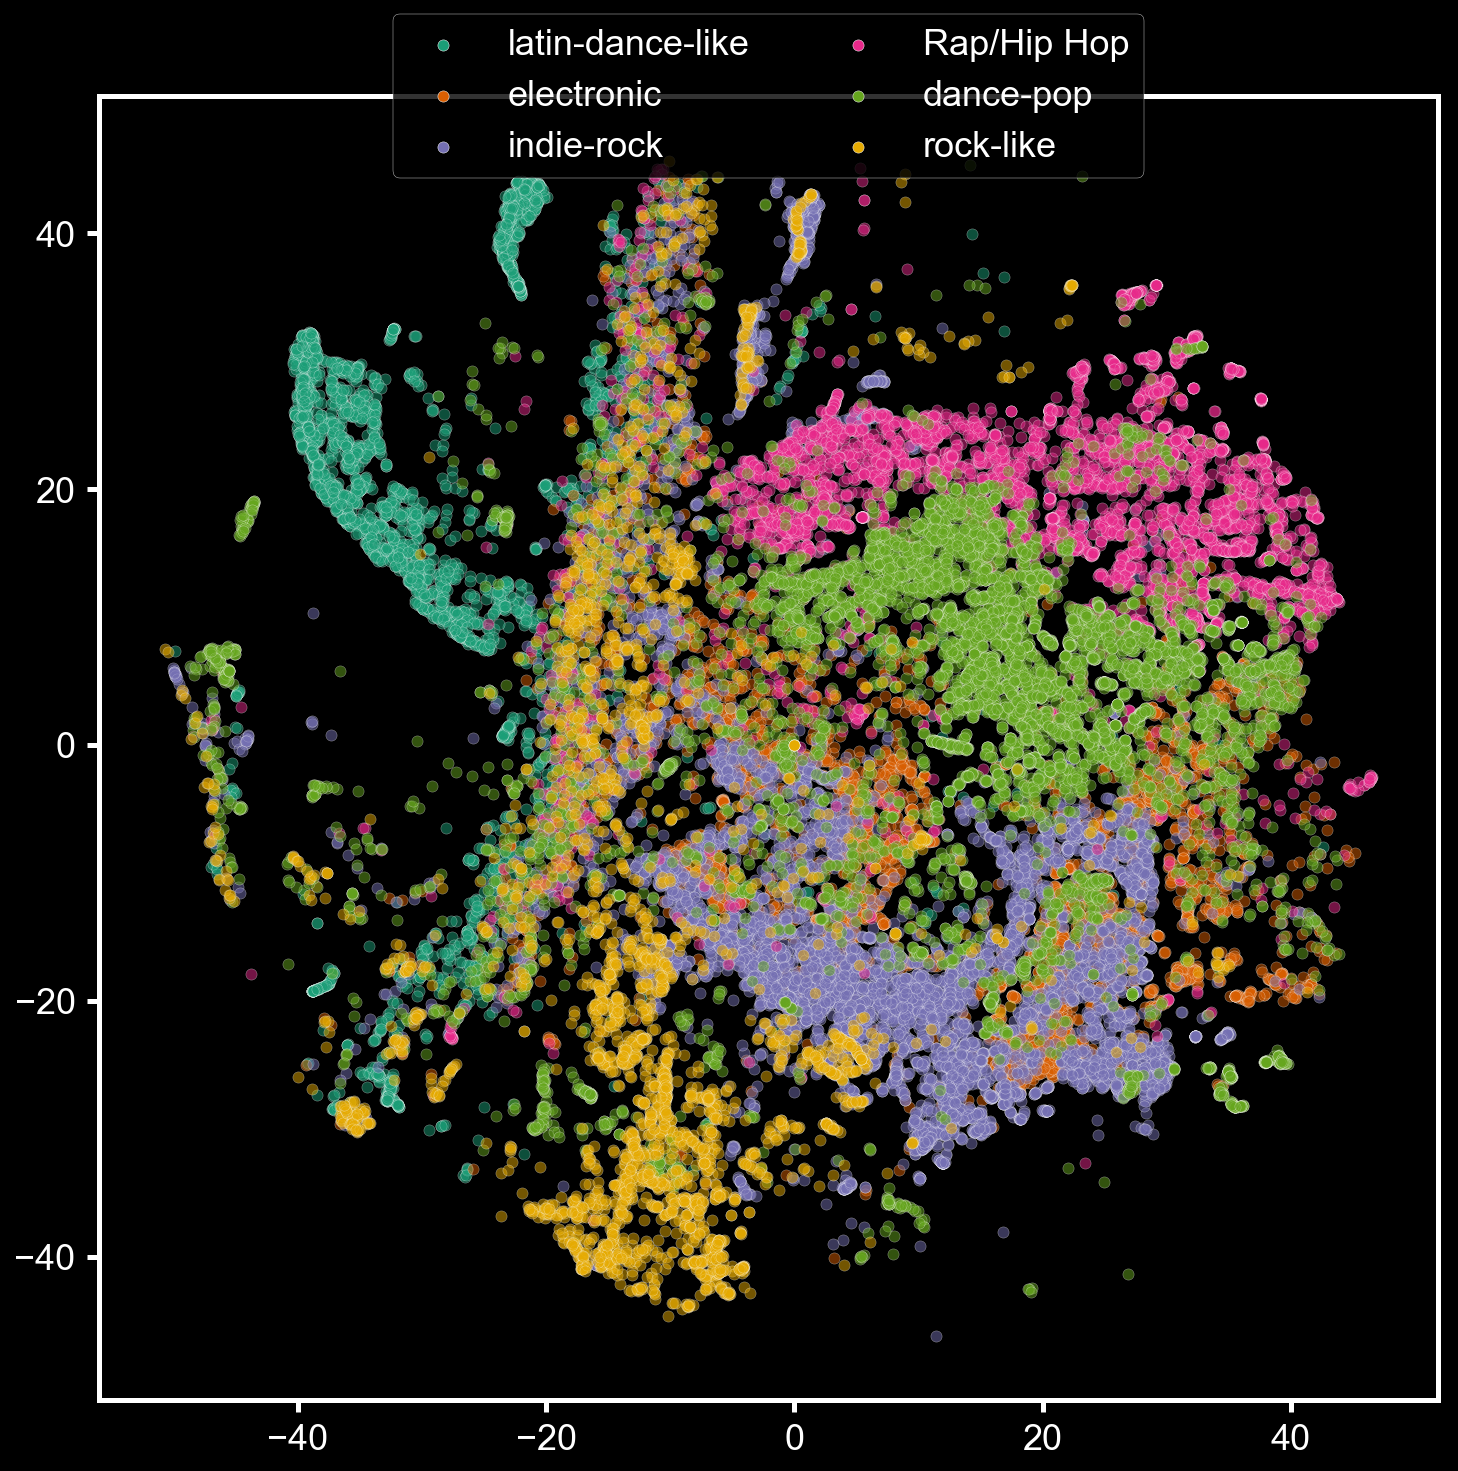

In [59]:
plt.style.use('dark_background')

plt.figure(figsize=(12,12))
topics=[4,16,11,0,19,6]
print([gtopic_explain[topic] for topic in topics])
pal = sns.color_palette('Dark2',len(topics))
topic2pal={topic:pal[indx] for indx,topic in enumerate(topics)}
for topic in topics:
    X_sub = np.array([X_emb[indx] for indx,turi in enumerate(turis) if gtopic[turi]==topic])
    plt.scatter(X_sub[:, 0], X_sub[:, 1],c=topic2pal[topic],alpha=0.5,edgecolor='w')
    plt.scatter([0.0],[0.0],c=topic2pal[topic],alpha=1.0,label=gtopic_explain[topic],edgecolor='w')
    
leg = plt.legend(ncol=2,loc='center',bbox_to_anchor=(0.5,1),frameon=True)
leg.get_frame().set_edgecolor('w')
plt.savefig('../reports/tsne_inv.svg')
plt.savefig('../reports/tsne_inv.png',dpi=300)
plt.show()

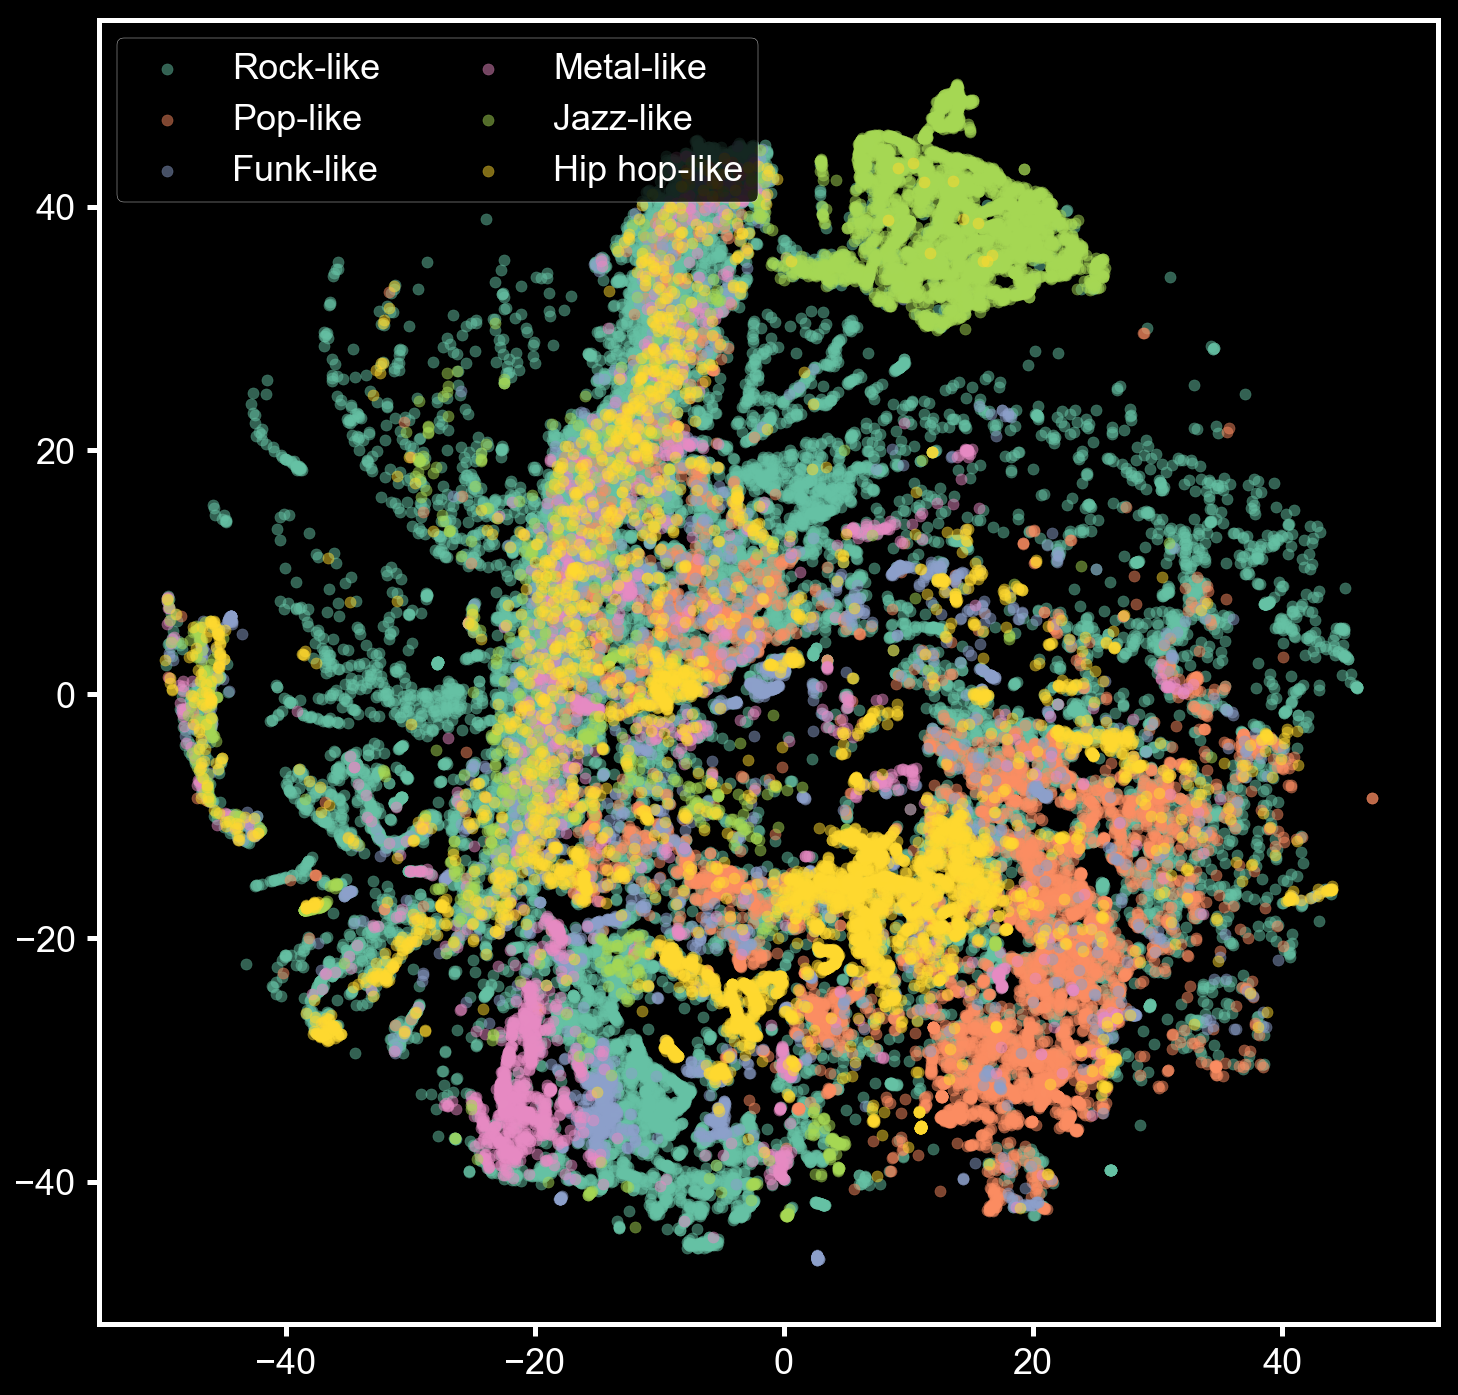

In [55]:
plt.style.use('dark_background')
plt.figure(figsize=(12,12))
pal = sns.color_palette('Set2',len(genre_topics))
for key,indx in genre_topics.items():
    X_sub = np.array([x for indx,x in enumerate(X_emb) if gtopic[indx]==key])
    plt.scatter(X_sub[:, 0], X_sub[:, 1],c=pal[key],alpha=0.5,label=indx)
leg = plt.legend(ncol=2,loc='upper left',frameon=True)
leg.get_frame().set_edgecolor('w')
plt.savefig('tsne_inv.svg')
plt.savefig('tsne_inv.png',dpi=300)
plt.show()

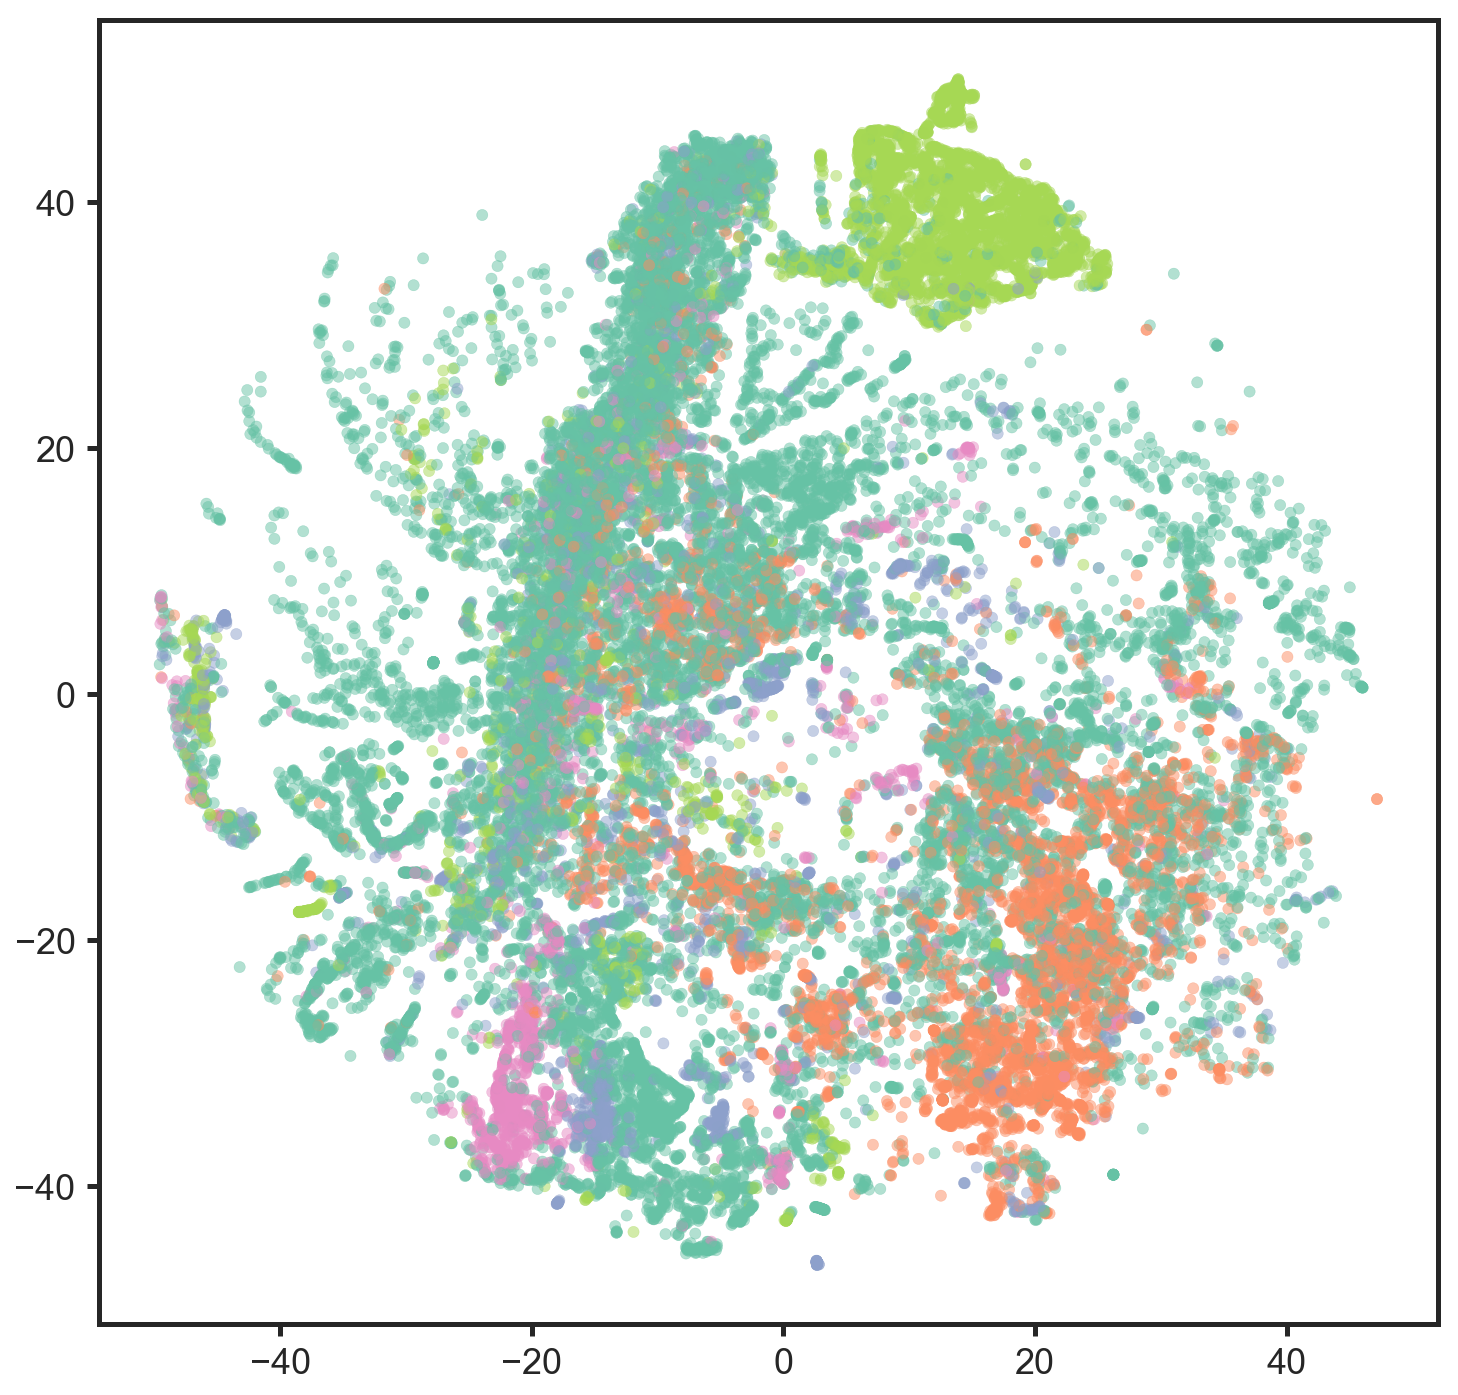

In [22]:
plt.figure(figsize=(12,12))
plt.scatter(X_sub[:, 0], X_sub[:, 1], c=c,alpha=0.5)
plt.show()